In [17]:
import pandas as pd

In [77]:
report_df = pd.read_csv('./report-hs.csv')

In [78]:
report_df[:2]

DBN                          School Name  School Type  Enrollment  \
0  01M292           Orchard Collegiate Academy  High School         140   
1  01M448  University Neighborhood High School  High School         392   

  Rigorous Instruction Rating Collaborative Teachers Rating  \
0              Meeting Target              Exceeding Target   
1              Meeting Target                Meeting Target   

  Supportive Environment Rating Effective School Leadership Rating  \
0                Meeting Target                     Meeting Target   
1              Exceeding Target                     Meeting Target   

  Strong Family-Community Ties Rating      Trust Rating  ...  \
0                  Approaching Target  Exceeding Target  ...   
1                      Meeting Target  Exceeding Target  ...   

  Percent HRA Eligible  Percent Asian  Percent Black  Percent Hispanic  \
0                0.621          0.150          0.243             0.550   
1                0.538          0.301          0.245             0.421   

   Percent White  Years of principal experience at this school  \
0          0.050                                           1.9   
1          0.028                                           7.5   

   Percent of teachers with 3 or more years of experience  \
0                                              0.500        
1                                              0.429        

  Student Attendance Rate Percent of Students Chronically Absent  \
0                   0.867                                  0.448   
1                   0.925                                  0.244   

  Teacher Attendance Rate  
0                   0.973  
1                   0.971  

[2 rows x 46 columns]

In [83]:
report_df.columns

Index(['DBN', 'School Name', 'School Type', 'Enrollment',
       'Rigorous Instruction Rating', 'Collaborative Teachers Rating',
       'Supportive Environment Rating', 'Effective School Leadership Rating',
       'Strong Family-Community Ties Rating', 'Trust Rating',
       'Student Achievement Rating', 'Rigorous Instruction - Percent Positive',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Effective School Leadership - Percent Positive',
       'Strong Family-Community Ties - Percent Positive',
       'Trust - Percent Positive',
       'Quality Review - How interesting and challenging is the curriculum?',
       'Quality Review - How effective is the teaching and learning?',
       'Quality Review - How well does the school assess what students are learning?',
       'Quality Review - How clearly are high expectations communicated to students and staff?',
       'Quality Review - How well do teachers work with each oth

In [30]:
df_dir = pd.read_csv('./hs_directory.csv')

In [176]:
cols = ['dbn', 'total_students', 'graduation_rate', 'attendance_rate',
       'pct_stu_enough_variety', 'college_career_rate', 'pct_stu_safe',
       'girls', 'boys', 'pbat', 'international', 'specialized', 'transfer',
       'ptech', 'earlycollege', 'school_accessibility_description']
geo_cols = ['zip', 'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL']

comb_cols = cols + geo_cols

In [178]:
# comb_cols

In [179]:
dir_selected = df_dir[comb_cols]

In [185]:
# dir_selected['DBN']
# df_dir['dbn']

# dir_selected

# dir_selected['dbn'].value_counts()

In [134]:
# reduced_cols = [col for col in df_dir.columns if 'academic' not in col]
# reduced_cols = [col for col in reduced_cols if 'directions' not in col]
# reduced_cols = [col for col in reduced_cols if 'prg' not in col]
# reduced_cols = [col for col in reduced_cols if 'requirement' not in col]
repeated_cols = pd.Series([col[:4] for col in df_dir.columns]).value_counts()[:17].index
selected_columns = []
for repeated_col in repeated_cols:
    selected_columns += [col for col in df_dir.columns if repeated_col in col]

In [137]:
cols_to_choose = set(df_dir.columns) - set(selected_columns)

In [144]:
# df_dir[cols_to_choose]

# df_dir



In [158]:



# df_dir.select_dtypes(exclude = 'object').dtypes.index[-8:]

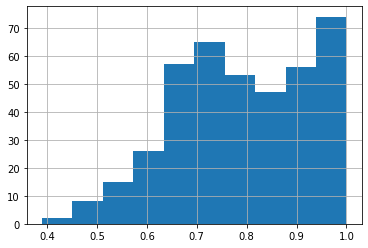

In [91]:
df_dir['graduation_rate']

In [20]:
df_grad = pd.read_csv('./graduation_outcomes_school.csv')

In [74]:
schools_2014 = df_grad[df_grad['Cohort Year'] == 2014]

In [79]:
selected_2014 = schools_2014[['DBN', 'Total Grads % of cohort']]

In [174]:
dir_selected[:2]

total_students  graduation_rate  attendance_rate  pct_stu_enough_variety  \
0             594             0.74             0.85                    0.58   
1             417             0.63             0.88                    0.92   

   college_career_rate  pct_stu_safe  girls  boys  pbat  international  ...  \
0                 0.49          0.74    NaN   NaN   NaN            NaN  ...   
1                 0.53          0.86    NaN   NaN   1.0            1.0  ...   

   earlycollege  school_accessibility_description    zip   Latitude  \
0           NaN                               2.0  11221  40.688831   
1           NaN                               2.0  11225  40.670349   

   Longitude  Community Board  Council District  Census Tract        BIN  \
0 -73.920906                3                41           375  3039676.0   
1 -73.961695                9                35           213  3029686.0   

            BBL  
0  3.014820e+09  
1  3.011870e+09  

[2 rows x 23 columns]

In [192]:
selected_2014[:2]

DBN Total Grads % of cohort
0   01M292                    96.6
10  01M292                    86.2

In [194]:
comb_schools = pd.merge(report_df,  dir_selected, left_on = 'DBN', right_on = 'dbn')

In [196]:
comb_schools.to_csv('./combined_schools.csv')

In [75]:
schools_2014[:3]

DBN                 School Name Demographic Category  \
0   01M292  ORCHARD COLLEGIATE ACADEMY         All Students   
10  01M292  ORCHARD COLLEGIATE ACADEMY         All Students   
51  01M292  ORCHARD COLLEGIATE ACADEMY           ELL Status   

   Demographic Variable  Cohort Year         Cohort  Total Cohort #  \
0          All Students         2014  4 year August              29   
10         All Students         2014    4 year June              29   
51          Current ELL         2014  4 year August               1   

   Total Grads # Total Grads % of cohort Total Regents #  ...  \
0             28                    96.6              25  ...   
10            25                    86.2              22  ...   
51             s                       s               s  ...   

   Regents w/o Advanced # Regents w/o Advanced % of cohort  \
0                      25                             86.2   
10                     22                             75.9   
51                      s                                s   

   Regents w/o Advanced % of grads Local # Local % of cohort Local % of grads  \
0                             89.3       3              10.3             10.7   
10                            88.0       3              10.3             12.0   
51                               s       s                 s                s   

   Still Enrolled # Still Enrolled % of cohort Dropped Out #  \
0                 0                        0.0             1   
10                3                       10.3             1   
51                s                          s             s   

   Dropped Out % of cohort  
0                      3.4  
10                     3.4  
51                       s  

[3 rows x 25 columns]

In [72]:
percent_grads = schools_2014['Total Grads % of cohort']

In [73]:
percent_grads.value_counts(normalize = True)

s        0.302446
100.0    0.074738
83.3     0.011645
80.0     0.011437
66.7     0.011271
75.0     0.009691
0.0      0.009483
50.0     0.008484
85.7     0.008443
60.0     0.006530
87.5     0.006280
71.4     0.006031
88.9     0.005781
90.0     0.004866
77.8     0.004741
81.8     0.004575
92.3     0.004076
40.0     0.003868
20.0     0.003826
72.7     0.003743
90.9     0.003535
92.9     0.003535
82.4     0.003494
33.3     0.003452
84.6     0.003452
62.5     0.003369
91.7     0.003327
86.7     0.003286
57.1     0.003244
76.9     0.003161
           ...   
51.8     0.000042
18.0     0.000042
47.3     0.000042
63.1     0.000042
59.9     0.000042
33.1     0.000042
5.1      0.000042
48.5     0.000042
83.4     0.000042
7.8      0.000042
15.9     0.000042
49.7     0.000042
1.5      0.000042
7.2      0.000042
27.4     0.000042
38.4     0.000042
9.3      0.000042
24.7     0.000042
21.0     0.000042
38.2     0.000042
11.2     0.000042
27.6     0.000042
11.0     0.000042
39.0     0.000042
50.6     0

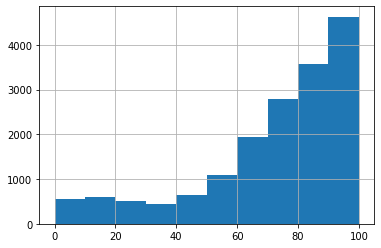

In [38]:
pd.to_numeric(percent_grads[~(percent_grads == 's')]).hist()

In [60]:
percent_grads.value_counts(normalize = True)

s        0.302446
100.0    0.074738
83.3     0.011645
80.0     0.011437
66.7     0.011271
75.0     0.009691
0.0      0.009483
50.0     0.008484
85.7     0.008443
60.0     0.006530
87.5     0.006280
71.4     0.006031
88.9     0.005781
90.0     0.004866
77.8     0.004741
81.8     0.004575
92.3     0.004076
40.0     0.003868
20.0     0.003826
72.7     0.003743
90.9     0.003535
92.9     0.003535
82.4     0.003494
33.3     0.003452
84.6     0.003452
62.5     0.003369
91.7     0.003327
86.7     0.003286
57.1     0.003244
76.9     0.003161
           ...   
51.8     0.000042
18.0     0.000042
47.3     0.000042
63.1     0.000042
59.9     0.000042
33.1     0.000042
5.1      0.000042
48.5     0.000042
83.4     0.000042
7.8      0.000042
15.9     0.000042
49.7     0.000042
1.5      0.000042
7.2      0.000042
27.4     0.000042
38.4     0.000042
9.3      0.000042
24.7     0.000042
21.0     0.000042
38.2     0.000042
11.2     0.000042
27.6     0.000042
11.0     0.000042
39.0     0.000042
50.6     0

In [40]:
total_regents = schools_2014['Total Regents % of grads']

In [43]:
# total_regents.value_counts()

In [49]:


regents_selected = total_regents[~(total_regents == 's')]

In [ ]:
# regents_selected

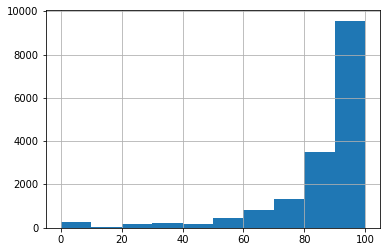

In [53]:


pd.to_numeric(regents_selected[~(regents_selected == 'No Data')]).hist()

In [54]:
schools_2014.columns

Index(['DBN', 'School Name', 'Demographic Category', 'Demographic Variable',
       'Cohort Year', 'Cohort', 'Total Cohort #', 'Total Grads #',
       'Total Grads % of cohort', 'Total Regents #',
       'Total Regents % of cohort', 'Total Regents % of grads',
       'Advanced Regents #', 'Advanced Regents % of cohort',
       'Advanced Regents % of grads', 'Regents w/o Advanced #',
       'Regents w/o Advanced % of cohort', 'Regents w/o Advanced % of grads',
       'Local #', 'Local % of cohort', 'Local % of grads', 'Still Enrolled #',
       'Still Enrolled % of cohort', 'Dropped Out #',
       'Dropped Out % of cohort'],
      dtype='object')

In [57]:
adv_regents = schools_2014['Advanced Regents % of cohort']
adv_regents_selected = adv_regents[~(adv_regents == 's')]


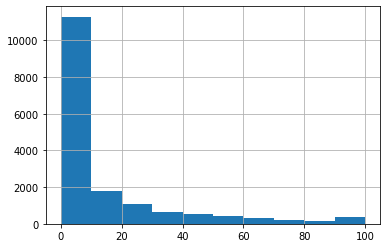

In [59]:
pd.to_numeric(adv_regents_selected).hist()